<a href="https://colab.research.google.com/github/Hyeyum/baseball_data/blob/main/2022_kbo_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

#Best 10 Player 및 구단별 주요 실적 분석

In [46]:
import pandas as pd
raw = pd.read_csv('baseball.csv', encoding = 'cp949')

columns_select = ['팀', '이름', '월', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비']
data = raw[columns_select]

data = data.replace('22L', 'LG')
data = data.replace('22S', 'SSG')
data = data.replace('22삼', '삼성')
data = data.replace('22롯', '롯데')
data = data.replace('22N', 'NC')
data = data.replace('22기', 'KIA')
data = data.replace('22K', 'KT')
data = data.replace('22키', '키움')
data = data.replace('22두', '두산')
data = data.replace('22한', '한화')

data.head()

,팀,이름,월,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,LG,문성주,4,60,26,0,35,6,11,0,1
1,롯데,한동희,4,89,38,7,68,22,10,1,1
2,SSG,한유섬,4,86,34,3,58,27,12,4,1
3,삼성,피렐라,4,100,39,2,55,15,6,3,0
4,롯데,이대호,4,90,32,2,40,10,7,1,2


In [47]:
#선수별 기록 집계
#pivot_table 이용하여 팀, 이름, 월 기준으로 '루타, 볼넷, 사구, 안타, 타수, 타점, 홈런, 희비'의 총 합계 집계

data_player = data.pivot_table(index = ['팀', '이름'],
                               values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'],
                               aggfunc = 'sum')

data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름                                    
KIA 김도영   20   2   1   15   84   4   0   0
    김석환   13   7   2    9   52   3   1   0
    김선빈  177  65   6  145  505  61   3   3
    김호령   14   6   0   12   49   4   0   0
    나성범  286  64  17  180  563  97  21   5
...      ...  ..  ..  ...  ...  ..  ..  ..
한화  장진혁    8   1   0    8   55   3   0   1
    정은원  188  85   1  140  508  49   8   3
    최재훈  110  44  21   81  364  30   5   2
    터크먼  247  64   7  166  575  43  12   2
    하주석  142  25   3  109  400  53   5   2

[132 rows x 8 columns]

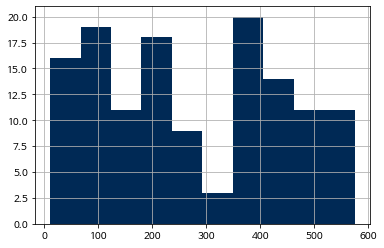

In [48]:
#타수 분포 살펴보기

data_player['타수'].hist()

In [49]:
#타수 50 이하인 선수들 제거

cond = data_player['타수'] > 50
data_player = data_player[cond].reset_index()
data_player

,팀,이름,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김도영,20,2,1,15,84,4,0,0
1,KIA,김석환,13,7,2,9,52,3,1,0
2,KIA,김선빈,177,65,6,145,505,61,3,3
3,KIA,나성범,286,64,17,180,563,97,21,5
4,KIA,류지혁,141,56,6,112,405,48,2,2
...,...,...,...,...,...,...,...,...,...,...
117,한화,장진혁,8,1,0,8,55,3,0,1
118,한화,정은원,188,85,1,140,508,49,8,3
119,한화,최재훈,110,44,21,81,364,30,5,2
120,한화,터크먼,247,64,7,166,575,43,12,2


In [50]:
#타율, 출루율, 장타율, OPS를 계산해주는 함수 생성
def cal_hit(df) :
  df['타율'] = df['안타'] / df['타수']
  df['출루율'] = (df['안타'] + df['볼넷'] + df['사구']) / (df['타수'] + df['볼넷'] + df['사구'] + df['희비'])
  df['장타율'] = df['루타'] / df['타수']
  df['OPS'] = df['출루율'] + df['장타율']
  return df

player_stat = cal_hit(data_player)
player_stat

,팀,이름,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김도영,20,2,1,15,84,4,0,0,0.178571,0.206897,0.238095,0.444992
1,KIA,김석환,13,7,2,9,52,3,1,0,0.173077,0.295082,0.250000,0.545082
2,KIA,김선빈,177,65,6,145,505,61,3,3,0.287129,0.373057,0.350495,0.723552
3,KIA,나성범,286,64,17,180,563,97,21,5,0.319716,0.402157,0.507993,0.910150
4,KIA,류지혁,141,56,6,112,405,48,2,2,0.276543,0.371002,0.348148,0.719150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,한화,장진혁,8,1,0,8,55,3,0,1,0.145455,0.157895,0.145455,0.303349
118,한화,정은원,188,85,1,140,508,49,8,3,0.275591,0.378559,0.370079,0.748638
119,한화,최재훈,110,44,21,81,364,30,5,2,0.222527,0.338747,0.302198,0.640945
120,한화,터크먼,247,64,7,166,575,43,12,2,0.288696,0.365741,0.429565,0.795306


In [51]:
#출루율, 장타율, OPS, 타율 순서대로 best 10 players

player_stat = player_stat.sort_values(by = ['출루율', '장타율', 'OPS', '타율'], ascending = False)
player_stat = player_stat.reset_index(drop = True)
player_stat.head(10)

,팀,이름,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,롯데,고승민,39,7,0,27,64,13,2,1,0.421875,0.472222,0.609375,1.081597
1,LG,문성주,116,37,2,86,250,33,4,1,0.344000,0.431034,0.464000,0.895034
2,삼성,강한울,66,14,0,53,143,20,1,1,0.370629,0.424051,0.461538,0.885589
3,키움,이정후,316,64,5,191,544,113,23,3,0.351103,0.422078,0.580882,1.002960
4,삼성,김재성,43,11,1,34,96,18,1,2,0.354167,0.418182,0.447917,0.866098
5,삼성,피렐라,317,55,12,192,561,109,28,2,0.342246,0.411111,0.565062,0.976173
6,KT,김준태,71,27,0,49,156,19,2,2,0.314103,0.410811,0.455128,0.865939
7,NC,박건우,187,44,8,137,408,61,10,3,0.335784,0.408207,0.458333,0.866541
8,두산,김인태,55,31,3,42,153,18,3,0,0.274510,0.406417,0.359477,0.765894
9,KIA,나성범,286,64,17,180,563,97,21,5,0.319716,0.402157,0.507993,0.910150


In [52]:
player_stat['이름'][:10]

0    고승민
1    문성주
2    강한울
3    이정후
4    김재성
5    피렐라
6    김준태
7    박건우
8    김인태
9    나성범
Name: 이름, dtype: object

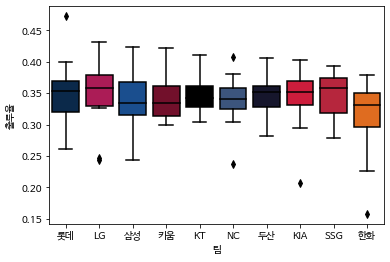

In [84]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

customPalette = sns.set_palette(sns.color_palette(['#002955', '#C30452', '#074CA1', '#820024', '#000000', '#315288', '#131230', '#EA0029', '#CE0E2D', '#FF6600']))
sns.boxplot(data = player_stat, x = '팀', y = '출루율')

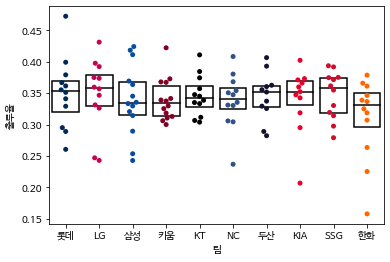

In [85]:
#출루율

sns.swarmplot(data = player_stat, x = '팀', y = '출루율')
sns.boxplot(data = player_stat, x ='팀', y = '출루율',
            showcaps = False, #박스 상단 가로라인 보이지 않기
            whiskerprops = {'linewidth' : 0}, #박스 상단 세로 라인 보이지 않기
            showfliers = False, #박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops = {'facecolor' : 'None'}, #박스 색상 지우기기
            )

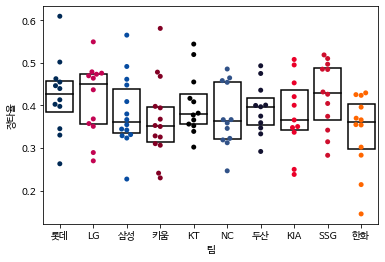

In [86]:
#장타율

sns.swarmplot(data = player_stat, x = '팀', y = '장타율')
sns.boxplot(data = player_stat, x ='팀', y = '장타율',
            showcaps = False, #박스 상단 가로라인 보이지 않기
            whiskerprops = {'linewidth' : 0}, #박스 상단 세로 라인 보이지 않기
            showfliers = False, #박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops = {'facecolor' : 'None'}, #박스 색상 지우기기
            )

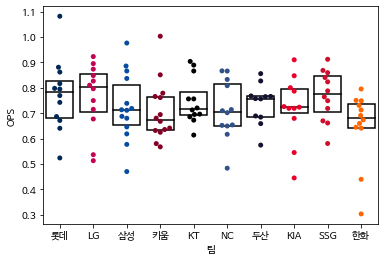

In [87]:
#OPS

sns.swarmplot(data = player_stat, x = '팀', y = 'OPS')
sns.boxplot(data = player_stat, x ='팀', y = 'OPS',
            showcaps = False, #박스 상단 가로라인 보이지 않기
            whiskerprops = {'linewidth' : 0}, #박스 상단 세로 라인 보이지 않기
            showfliers = False, #박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops = {'facecolor' : 'None'}, #박스 색상 지우기
            )

# 야구 선수는 어떤 계절에 강해질까?

In [88]:
raw = pd.read_csv('baseball.csv', encoding = 'cp949')

columns_select = ['팀', '이름', '월', '타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비']
data = raw[columns_select]

data = data.replace('22L', 'LG')
data = data.replace('22S', 'SSG')
data = data.replace('22삼', '삼성')
data = data.replace('22롯', '롯데')
data = data.replace('22N', 'NC')
data = data.replace('22기', 'KIA')
data = data.replace('22K', 'KT')
data = data.replace('22키', '키움')
data = data.replace('22두', '두산')
data = data.replace('22한', '한화')

data_player_month = data.pivot_table(index = ['팀', '이름', '월'],
                                     values = ['타수', '안타', '홈런', '루타', '타점', '볼넷', '사구', '희비'],
                                     aggfunc = 'sum', fill_value = 0
                                     )
data_player_month = data_player_month.reset_index()

data_player_month

,팀,이름,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김도영,4,20,2,1,15,84,4,0,0
1,KIA,김석환,4,13,7,2,9,52,3,1,0
2,KIA,김선빈,4,39,11,0,29,87,10,1,0
3,KIA,김선빈,5,29,18,3,25,86,7,0,1
4,KIA,김선빈,6,27,9,2,22,91,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
525,한화,하주석,4,23,8,1,21,93,9,0,0
526,한화,하주석,5,27,5,1,17,72,17,3,1
527,한화,하주석,7,38,3,0,28,68,12,1,0
528,한화,하주석,8,25,5,1,19,77,9,1,1


In [89]:
#타율, 출루율, 장타율, OPS 칼럼 추가

player_month_stat = cal_hit(data_player_month)
player_month_stat.head()

,팀,이름,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김도영,4,20,2,1,15,84,4,0,0,0.178571,0.206897,0.238095,0.444992
1,KIA,김석환,4,13,7,2,9,52,3,1,0,0.173077,0.295082,0.250000,0.545082
2,KIA,김선빈,4,39,11,0,29,87,10,1,0,0.333333,0.408163,0.448276,0.856439
3,KIA,김선빈,5,29,18,3,25,86,7,0,1,0.290698,0.425926,0.337209,0.763135
4,KIA,김선빈,6,27,9,2,22,91,8,1,0,0.241758,0.323529,0.296703,0.620233


In [90]:
#월별 출루율
month_pivot = player_month_stat.pivot_table(index = ['팀', '이름'],
                                            columns = '월',
                                            values = '출루율')
month_pivot = month_pivot.reset_index()

month_pivot

월,팀,이름,4,5,6,7,8,9,10
0,KIA,김도영,0.206897,NaN,NaN,NaN,NaN,NaN,NaN
1,KIA,김석환,0.295082,NaN,NaN,NaN,NaN,NaN,NaN
2,KIA,김선빈,0.408163,0.425926,0.323529,0.352113,0.409091,0.318182,0.333333
3,KIA,김호령,NaN,NaN,NaN,0.327273,NaN,NaN,NaN
4,KIA,나성범,0.424528,0.433333,0.348624,0.457831,0.370000,0.401961,0.344828
...,...,...,...,...,...,...,...,...,...
127,한화,장진혁,NaN,NaN,NaN,NaN,0.157895,NaN,NaN
128,한화,정은원,0.285714,0.363636,0.484536,0.344828,0.390805,0.418367,0.300000
129,한화,최재훈,0.360825,0.287500,0.308824,0.294118,0.375000,0.338462,0.642857
130,한화,터크먼,0.361111,0.373913,0.359223,0.319149,0.313131,0.427273,0.526316


In [91]:
df = pd.merge(player_stat, month_pivot, how = 'left', on = ['팀', '이름'])

df.head(10)

,팀,이름,루타,볼넷,사구,안타,타수,타점,홈런,희비,...,출루율,장타율,OPS,4,5,6,7,8,9,10
0,롯데,고승민,39,7,0,27,64,13,2,1,...,0.472222,0.609375,1.081597,NaN,NaN,NaN,NaN,0.464286,NaN,0.500000
1,LG,문성주,116,37,2,86,250,33,4,1,...,0.431034,0.464000,0.895034,0.513889,NaN,0.349206,0.471264,0.367647,NaN,NaN
2,삼성,강한울,66,14,0,53,143,20,1,1,...,0.424051,0.461538,0.885589,NaN,NaN,NaN,NaN,0.396825,0.455696,0.375000
3,키움,이정후,316,64,5,191,544,113,23,3,...,0.422078,0.580882,1.002960,0.377358,0.403846,0.495726,0.375000,0.377358,0.485437,NaN
4,삼성,김재성,43,11,1,34,96,18,1,2,...,0.418182,0.447917,0.866098,NaN,NaN,0.389831,0.450980,NaN,NaN,NaN
5,삼성,피렐라,317,55,12,192,561,109,28,2,...,0.411111,0.565062,0.976173,0.440367,0.505263,0.315315,0.411111,0.447917,0.378641,0.346154
6,KT,김준태,71,27,0,49,156,19,2,2,...,0.410811,0.455128,0.865939,NaN,0.432836,0.403226,NaN,0.392857,NaN,NaN
7,NC,박건우,187,44,8,137,408,61,10,3,...,0.408207,0.458333,0.866541,0.411215,0.390805,NaN,0.469388,0.395604,0.403670,0.400000
8,두산,김인태,55,31,3,42,153,18,3,0,...,0.406417,0.359477,0.765894,0.429907,NaN,NaN,NaN,0.375000,NaN,NaN
9,KIA,나성범,286,64,17,180,563,97,21,5,...,0.402157,0.507993,0.910150,0.424528,0.433333,0.348624,0.457831,0.370000,0.401961,0.344828


In [92]:
#출루율 상위 50명의 월별 데이터

df_obp = df.sort_values(by = '출루율', ascending = False).head(50)
df_obp_selected = df_obp[['팀', '이름', '출루율', 4, 5, 6, 7, 8, 9, 10]]
df_obp_selected = df_obp_selected.set_index(['팀', '이름'])

df_obp_selected

출루율         4         5         6         7         8  \
팀   이름                                                                  
롯데  고승민    0.472222       NaN       NaN       NaN       NaN  0.464286   
LG  문성주    0.431034  0.513889       NaN  0.349206  0.471264  0.367647   
삼성  강한울    0.424051       NaN       NaN       NaN       NaN  0.396825   
키움  이정후    0.422078  0.377358  0.403846  0.495726  0.375000  0.377358   
삼성  김재성    0.418182       NaN       NaN  0.389831  0.450980       NaN   
    피렐라    0.411111  0.440367  0.505263  0.315315  0.411111  0.447917   
KT  김준태    0.410811       NaN  0.432836  0.403226       NaN  0.392857   
NC  박건우    0.408207  0.411215  0.390805       NaN  0.469388  0.395604   
두산  김인태    0.406417  0.429907       NaN       NaN       NaN  0.375000   
KIA 나성범    0.402157  0.424528  0.433333  0.348624  0.457831  0.370000   
롯데  렉스     0.399083       NaN       NaN       NaN       NaN  0.362745   
LG  문보경    0.397500  0.306667       NaN  0.515625  0.320513  0.426471   
SSG 최정     0.393509  0.423077  0.310680  0.554054  0.367647  0.391753   
두산  안권수    0.392857       NaN  0.394495  0.390805       NaN       NaN   
LG  홍창기    0.392157  0.385542  0.396552  0.424242       NaN  0.348837   
SSG 추신수    0.391685  0.379747  0.423423  0.415842  0.379310  0.341772   
KT  알포드    0.384328       NaN       NaN       NaN  0.421053  0.340426   
NC  양의지    0.380282  0.320000  0.425287  0.318182  0.346154  0.487500   
롯데  이대호    0.379019  0.400000  0.387755  0.375000  0.306818  0.397959   
한화  정은원    0.378559  0.285714  0.363636  0.484536  0.344828  0.390805   
SSG 한유섬    0.375000  0.485437  0.370000  0.258427  0.361111  0.435294   
LG  김현수    0.374793  0.390476  0.379630  0.340000  0.342466  0.366667   
SSG 박성한    0.374552  0.347826  0.469388  0.364583  0.423077  0.287356   
KT  조용호    0.374291  0.281690  0.403670  0.458333  0.435484  0.360000   
LG  가르시아   0.373494       NaN       NaN       NaN       NaN  0.373494   
KIA 김선빈    0.373057  0.408163  0.425926  0.323529  0.352113  0.409091   
키움  푸이그    0.372671  0.330097  0.307018       NaN  0.385965  0.453704   
SSG 라가레스   0.371429       NaN       NaN       NaN       NaN  0.337838   
KIA 류지혁    0.371002  0.378788  0.439560  0.294872  0.352941  0.328571   
삼성  김지찬    0.369186  0.353659  0.377551       NaN       NaN  0.381579   
NC  마티니    0.368056  0.352381  0.394495  0.358025  0.384615  0.321839   
키움  김혜성    0.367816  0.312500  0.383929  0.376147  0.352941  0.413462   
    임지열    0.367089       NaN       NaN       NaN       NaN       NaN   
롯데  황성빈    0.366667       NaN       NaN  0.367816  0.315789       NaN   
KIA 최형우    0.366038  0.406250  0.343434  0.322222  0.322581  0.406977   
한화  터크먼    0.365741  0.361111  0.373913  0.359223  0.319149  0.313131   
삼성  김현준    0.363636       NaN       NaN  0.426966  0.357895  0.303571   
두산  김민혁    0.362500       NaN       NaN       NaN       NaN       NaN   
SSG 최지훈    0.361465  0.381818  0.392523  0.351852  0.329268  0.384615   
롯데  한동희    0.361396  0.485149  0.263889  0.328125  0.379310  0.333333   
한화  이성곤    0.361111  0.361111       NaN       NaN       NaN       NaN   
두산  허경민    0.360360  0.377778  0.387097       NaN  0.347826  0.390805   
KIA 이창진    0.359873       NaN       NaN  0.333333  0.492308  0.270588   
LG  채은성    0.359408       NaN  0.387387  0.336957  0.434783  0.400000   
KT  김민혁    0.357143  0.329670  0.340909  0.318841       NaN  0.450000   
LG  오지환    0.356890  0.250000  0.366337  0.325843  0.392405  0.405063   
두산  페르난데스  0.355422  0.339806  0.372549  0.378641  0.395062  0.255814   
롯데  안치홍    0.355191  0.340000  0.388350  0.368932  0.348315  0.375000   
SSG 김강민    0.354839  0.354839       NaN       NaN       NaN       NaN   
NC  노진혁    0.353919  0.285714  0.342105       NaN  0.475410  0.379747   

                  9        10  
팀   이름                         
롯데  고승민         NaN  0.500000  
LG  문성주         NaN       NaN  
삼성  강한울    0.455696  0.375000  
키움  이정후    0.485437       NaN  
삼성  김재성         NaN       N

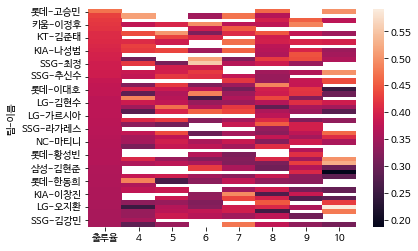

In [93]:
import matplotlib
import platform
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['axes.unicode_minus'] = False

sns.heatmap(df_obp_selected)

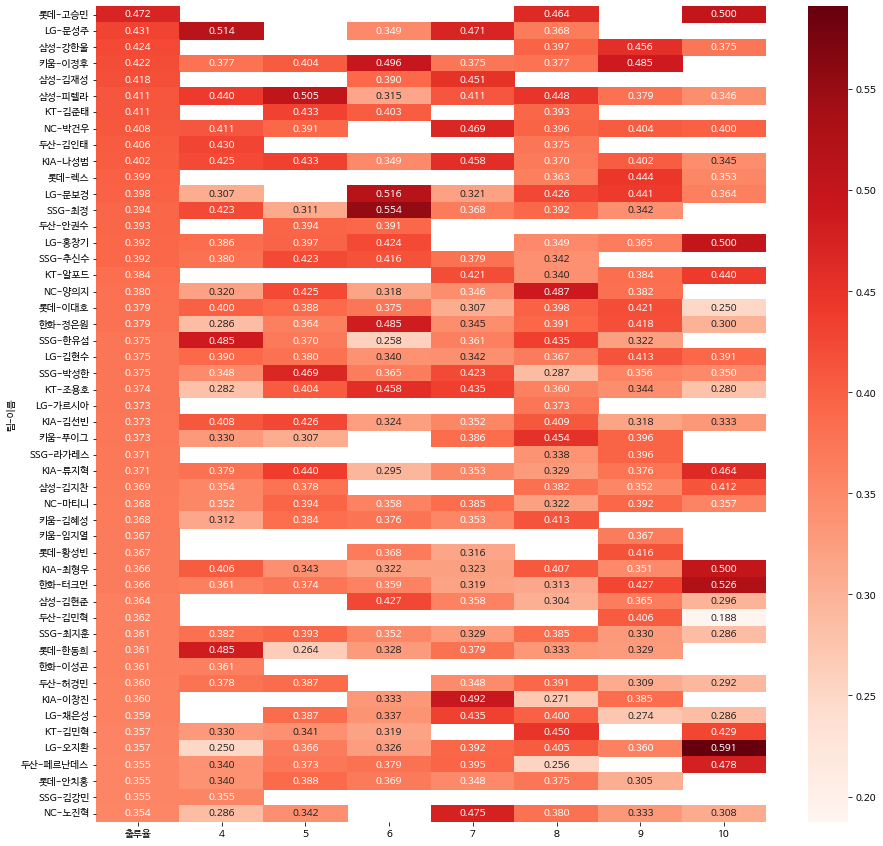

In [94]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data = df_obp_selected,
            annot = True, fmt = '.3f',
            cmap = 'Reds'
            )

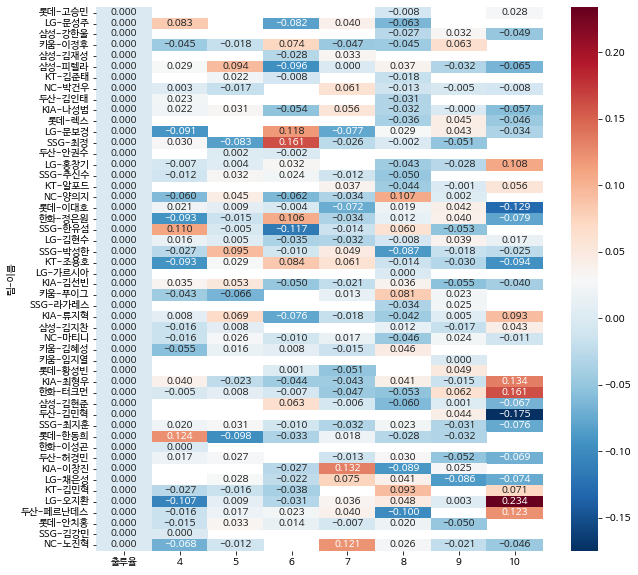

In [95]:
#시즌 전체 출루율과의 월별 출루율 차이
#시즌 출루율을 0으로 초기화해준다

for col in df_obp_selected.columns[1:] :
  df_obp_selected[col] = df_obp_selected[col] - df_obp_selected['출루율']
df_obp_selected['출루율'] = 0.0

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data = df_obp_selected.head(50),
            annot = True, fmt = '.3f',
            cmap = 'RdBu_r'
            )

In [96]:
#장타율 상위 50명의 월별 데이터

df_slg = df.sort_values(by = '장타율', ascending = False).head(50)
df_slg_selected = df_slg[['팀', '이름', '장타율', 4, 5, 6, 7, 8, 9, 10]]
df_slg_selected = df_slg_selected.set_index(['팀', '이름'])

df_slg_selected

장타율         4         5         6         7         8  \
팀   이름                                                                  
롯데  고승민    0.609375       NaN       NaN       NaN       NaN  0.464286   
키움  이정후    0.580882  0.377358  0.403846  0.495726  0.375000  0.377358   
삼성  피렐라    0.565062  0.440367  0.505263  0.315315  0.411111  0.447917   
LG  가르시아   0.549296       NaN       NaN       NaN       NaN  0.373494   
KT  박병호    0.544081  0.333333  0.336449  0.302083  0.383562  0.383721   
    알포드    0.519481       NaN       NaN       NaN  0.421053  0.340426   
SSG 최정     0.518610  0.423077  0.310680  0.554054  0.367647  0.391753   
    전의산    0.510101       NaN       NaN  0.380282  0.353846  0.268293   
KIA 나성범    0.507993  0.424528  0.433333  0.348624  0.457831  0.370000   
롯데  이대호    0.501852  0.400000  0.387755  0.375000  0.306818  0.397959   
SSG 라가레스   0.496855       NaN       NaN       NaN       NaN  0.337838   
KIA 소크라테스  0.495088  0.271845  0.447368  0.400000       NaN  0.336735   
두산  김민혁    0.493151       NaN       NaN       NaN       NaN       NaN   
삼성  오재일    0.491489  0.317647  0.360000  0.386139  0.347826  0.240000   
NC  양의지    0.485577  0.320000  0.425287  0.318182  0.346154  0.487500   
SSG 크론     0.485149  0.278846  0.279279       NaN       NaN       NaN   
    한유섬    0.484444  0.485437  0.370000  0.258427  0.361111  0.435294   
LG  이재원    0.478873       NaN  0.407895       NaN  0.246154       NaN   
키움  푸이그    0.478261  0.330097  0.307018       NaN  0.385965  0.453704   
LG  문보경    0.475783  0.306667       NaN  0.515625  0.320513  0.426471   
두산  김재환    0.475059  0.288462  0.370000  0.387097  0.319444       NaN   
LG  김현수    0.473282  0.390476  0.379630  0.340000  0.342466  0.366667   
    오지환    0.469636  0.250000  0.366337  0.325843  0.392405  0.405063   
키움  박찬혁    0.468354  0.310345       NaN       NaN       NaN       NaN   
NC  마티니    0.464706  0.352381  0.394495  0.358025  0.384615  0.321839   
LG  문성주    0.464000  0.513889       NaN  0.349206  0.471264  0.367647   
롯데  렉스     0.462766       NaN       NaN       NaN       NaN  0.362745   
삼성  강한울    0.461538       NaN       NaN       NaN       NaN  0.396825   
NC  박건우    0.458333  0.411215  0.390805       NaN  0.469388  0.395604   
KT  김준태    0.455128       NaN  0.432836  0.403226       NaN  0.392857   
롯데  한동희    0.454955  0.485149  0.263889  0.328125  0.379310  0.333333   
NC  노진혁    0.454301  0.285714  0.342105       NaN  0.475410  0.379747   
KIA 박동원    0.452991  0.383333  0.294737  0.354430       NaN  0.333333   
삼성  김재성    0.447917       NaN       NaN  0.389831  0.450980       NaN   
롯데  전준우    0.446389  0.357143  0.360000  0.361446  0.352941  0.367816   
    안치홍    0.439673  0.340000  0.388350  0.368932  0.348315  0.375000   
LG  채은성    0.436754       NaN  0.387387  0.336957  0.434783  0.400000   
두산  강승호    0.435829       NaN  0.324561  0.231579       NaN  0.415385   
SSG 추신수    0.431635  0.379747  0.423423  0.415842  0.379310  0.341772   
한화  터크먼    0.429565  0.361111  0.373913  0.359223  0.319149  0.313131   
SSG 최지훈    0.426316  0.381818  0.392523  0.351852  0.329268  0.384615   
한화  노수광    0.425414  0.275362  0.337838       NaN       NaN  0.368421   
    김인환    0.423773       NaN  0.333333  0.297619  0.357143  0.321839   
KIA 최형우    0.420705  0.406250  0.343434  0.322222  0.322581  0.406977   
KT  라모스    0.416667  0.303797       NaN       NaN       NaN       NaN   
롯데  이호연    0.413333       NaN       NaN  0.329114       NaN       NaN   
삼성  강민호    0.409091  0.284091  0.301370  0.290323  0.338710  0.366667   
KT  장성우    0.408602  0.337209  0.390244       NaN  0.312500       NaN   
SSG 최주환    0.404651  0.235294       NaN       NaN       NaN  0.385965   
롯데  황성빈    0.402715       NaN       NaN  0.367816  0.315789       NaN   

                  9        10  
팀   이름                         
롯데  고승민         NaN  0.500000  
키움  이정후    0.485437       NaN  
삼성  피렐라    0.378641  0.346154  
LG  가르시아        NaN       NaN  
KT  박병호         NaN       N

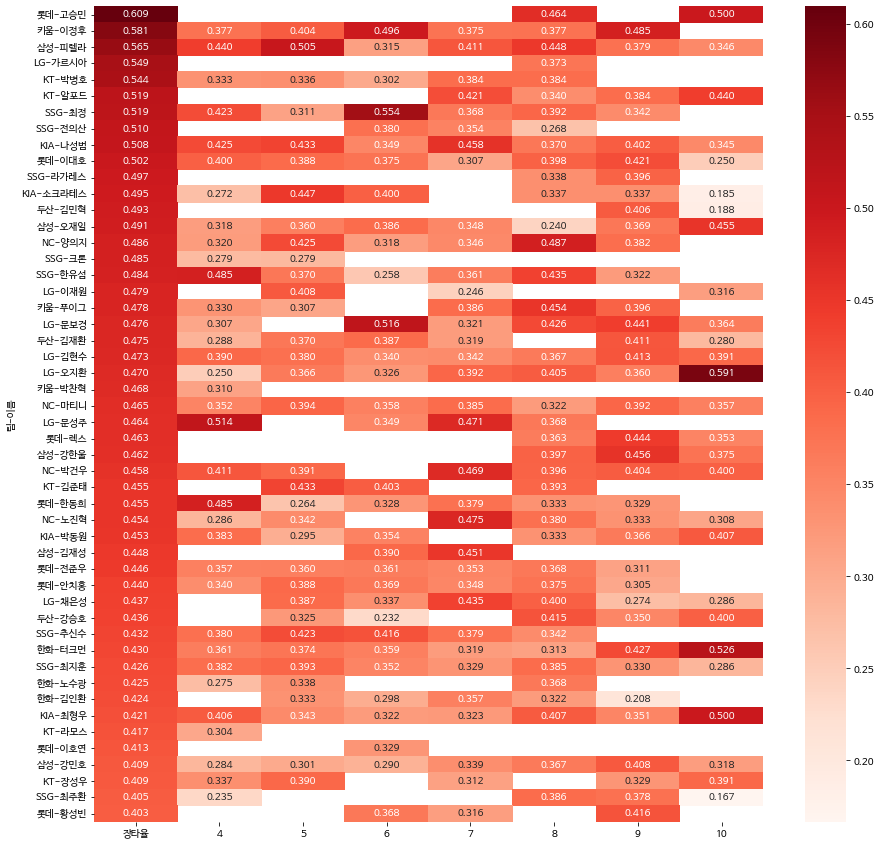

In [97]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data = df_slg_selected,
            annot = True, fmt = '.3f',
            cmap = 'Reds'
            )

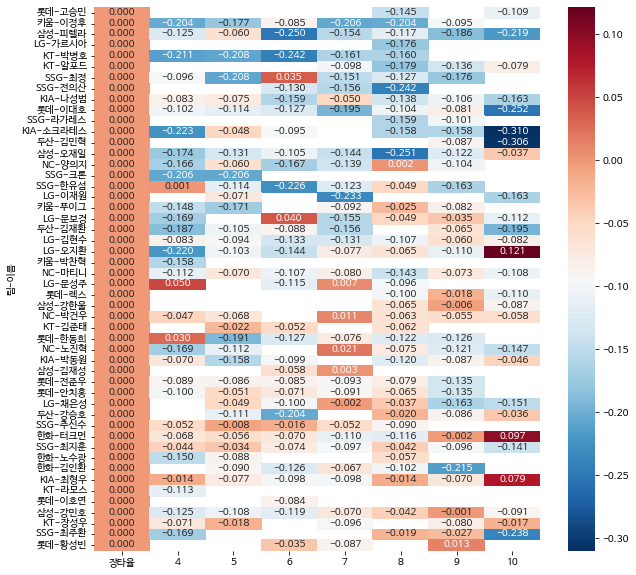

In [98]:
#시즌 전체 장타율과의 월별 장타율 차이
#시즌 장타율을 0으로 초기화해준다

for col in df_slg_selected.columns[1:] :
  df_slg_selected[col] = df_slg_selected[col] - df_slg_selected['장타율']
df_slg_selected['장타율'] = 0.0

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data = df_slg_selected.head(50),
            annot = True, fmt = '.3f',
            cmap = 'RdBu_r'
            )

In [99]:
#OPS 상위 50명의 월별 데이터

df_ops = df.sort_values(by = 'OPS', ascending = False).head(50)
df_ops_selected = df_ops[['팀', '이름', 'OPS', 4, 5, 6, 7, 8, 9, 10]]
df_ops_selected = df_ops_selected.set_index(['팀', '이름'])

df_ops_selected

,,OPS,4,5,6,7,8,9,10
팀,이름,,,,,,,,
롯데,고승민,1.081597,NaN,NaN,NaN,NaN,0.464286,NaN,0.500000
키움,이정후,1.002960,0.377358,0.403846,0.495726,0.375000,0.377358,0.485437,NaN
삼성,피렐라,0.976173,0.440367,0.505263,0.315315,0.411111,0.447917,0.378641,0.346154
LG,가르시아,0.922790,NaN,NaN,NaN,NaN,0.373494,NaN,NaN
SSG,최정,0.912120,0.423077,0.310680,0.554054,0.367647,0.391753,0.342466,NaN
KIA,나성범,0.910150,0.424528,0.433333,0.348624,0.457831,0.370000,0.401961,0.344828
KT,알포드,0.903809,NaN,NaN,NaN,0.421053,0.340426,0.383562,0.440000
LG,문성주,0.895034,0.513889,NaN,0.349206,0.471264,0.367647,NaN,NaN
KT,박병호,0.889213,0.333333,0.336449,0.302083,0.383562,0.383721,NaN,NaN


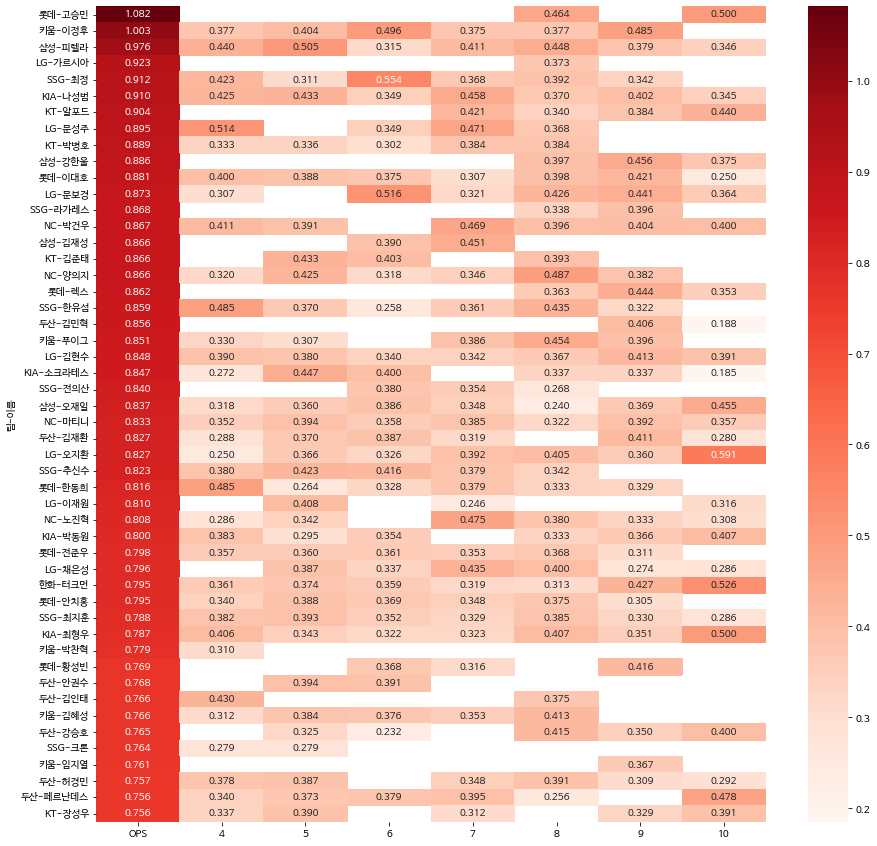

In [100]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data = df_ops_selected,
            annot = True, fmt = '.3f',
            cmap = 'Reds'
            )

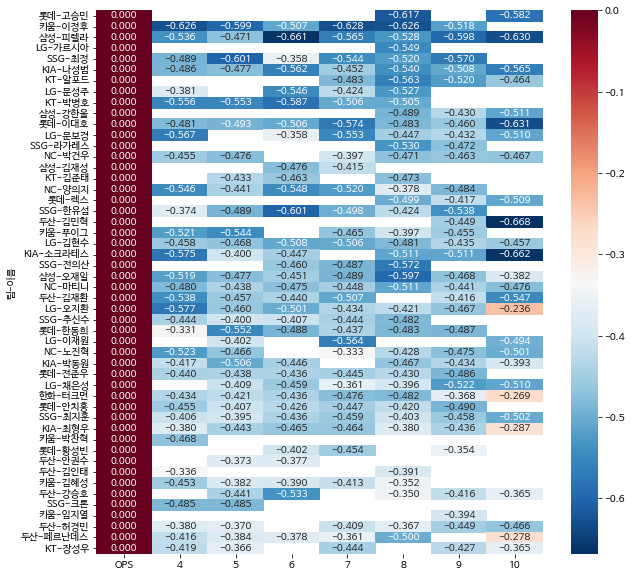

In [101]:
#시즌 전체 OPS와의 월별 OPS 차이
#시즌 OPS를 0으로 초기화해준다

for col in df_ops_selected.columns[1:] :
  df_ops_selected[col] = df_ops_selected[col] - df_ops_selected['OPS']
df_ops_selected['OPS'] = 0.0

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data = df_ops_selected.head(50),
            annot = True, fmt = '.3f',
            cmap = 'RdBu_r'
            )

In [102]:
#타율 상위 50명의 월별 데이터

df_ba = df.sort_values(by = '타율', ascending = False).head(50)
df_ba_selected = df_ba[['팀', '이름', '타율', 4, 5, 6, 7, 8, 9, 10]]
df_ba_selected = df_ba_selected.set_index(['팀', '이름'])

df_ba_selected

타율         4         5         6         7         8  \
팀   이름                                                                  
롯데  고승민    0.421875       NaN       NaN       NaN       NaN  0.464286   
삼성  강한울    0.370629       NaN       NaN       NaN       NaN  0.396825   
    김재성    0.354167       NaN       NaN  0.389831  0.450980       NaN   
키움  이정후    0.351103  0.377358  0.403846  0.495726  0.375000  0.377358   
LG  문성주    0.344000  0.513889       NaN  0.349206  0.471264  0.367647   
삼성  피렐라    0.342246  0.440367  0.505263  0.315315  0.411111  0.447917   
NC  박건우    0.335784  0.411215  0.390805       NaN  0.469388  0.395604   
롯데  이대호    0.331481  0.400000  0.387755  0.375000  0.306818  0.397959   
LG  문보경    0.330484  0.306667       NaN  0.515625  0.320513  0.426471   
SSG 라가레스   0.327044       NaN       NaN       NaN       NaN  0.337838   
두산  안권수    0.323864       NaN  0.394495  0.390805       NaN       NaN   
KIA 나성범    0.319716  0.424528  0.433333  0.348624  0.457831  0.370000   
롯데  황성빈    0.316742       NaN       NaN  0.367816  0.315789       NaN   
KT  김준태    0.314103       NaN  0.432836  0.403226       NaN  0.392857   
롯데  렉스     0.313830       NaN       NaN       NaN       NaN  0.362745   
키움  김혜성    0.311579  0.312500  0.383929  0.376147  0.352941  0.413462   
KIA 소크라테스  0.310413  0.271845  0.447368  0.400000       NaN  0.336735   
키움  임지열    0.309859       NaN       NaN       NaN       NaN       NaN   
두산  페르난데스  0.309368  0.339806  0.372549  0.378641  0.395062  0.255814   
롯데  한동희    0.308559  0.485149  0.263889  0.328125  0.379310  0.333333   
KT  조용호    0.308017  0.281690  0.403670  0.458333  0.435484  0.360000   
롯데  전준우    0.304158  0.357143  0.360000  0.361446  0.352941  0.367816   
SSG 최지훈    0.303509  0.381818  0.392523  0.351852  0.329268  0.384615   
두산  김민혁    0.301370       NaN       NaN       NaN       NaN       NaN   
NC  마티니    0.300000  0.352381  0.394495  0.358025  0.384615  0.321839   
KT  알포드    0.298701       NaN       NaN       NaN  0.421053  0.340426   
LG  채은성    0.298329       NaN  0.387387  0.336957  0.434783  0.400000   
SSG 박성한    0.297571  0.347826  0.469388  0.364583  0.423077  0.287356   
KT  김민혁    0.294118  0.329670  0.340909  0.318841       NaN  0.450000   
롯데  이호연    0.293333       NaN       NaN  0.329114       NaN       NaN   
두산  허경민    0.290076  0.377778  0.387097       NaN  0.347826  0.390805   
LG  박해민    0.289474  0.296296  0.375000  0.414894  0.365591  0.356322   
삼성  이해승    0.289474       NaN       NaN  0.289474       NaN       NaN   
한화  터크먼    0.288696  0.361111  0.373913  0.359223  0.319149  0.313131   
LG  홍창기    0.287383  0.385542  0.396552  0.424242       NaN  0.348837   
KIA 김선빈    0.287129  0.408163  0.425926  0.323529  0.352113  0.409091   
롯데  안치홍    0.286299  0.340000  0.388350  0.368932  0.348315  0.375000   
LG  김현수    0.286260  0.390476  0.379630  0.340000  0.342466  0.366667   
KIA 이창진    0.286232       NaN       NaN  0.333333  0.492308  0.270588   
삼성  김지찬    0.285714  0.353659  0.377551       NaN       NaN  0.381579   
    구자욱    0.284133  0.289474       NaN       NaN       NaN  0.329787   
NC  양의지    0.283654  0.320000  0.425287  0.318182  0.346154  0.487500   
    노진혁    0.282258  0.285714  0.342105       NaN  0.475410  0.379747   
키움  김태진    0.280172       NaN  0.337349       NaN       NaN  0.317073   
두산  강승호    0.278075       NaN  0.324561  0.231579       NaN  0.415385   
키움  푸이그    0.277778  0.330097  0.307018       NaN  0.385965  0.453704   
SSG 김강민    0.277778  0.354839       NaN       NaN       NaN       NaN   
삼성  김현준    0.277419       NaN       NaN  0.426966  0.357895  0.303571   
NC  손아섭    0.277372  0.353982  0.403509  0.351648  0.283333  0.333333   
삼성  오선진    0.277027       NaN       NaN  0.311828  0.367647       NaN   

                  9        10  
팀   이름                         
롯데  고승민         NaN  0.500000  
삼성  강한울    0.455696  0.375000  
    김재성         NaN       NaN  
키움  이정후    0.485437       NaN  
LG  문성주         NaN       Na

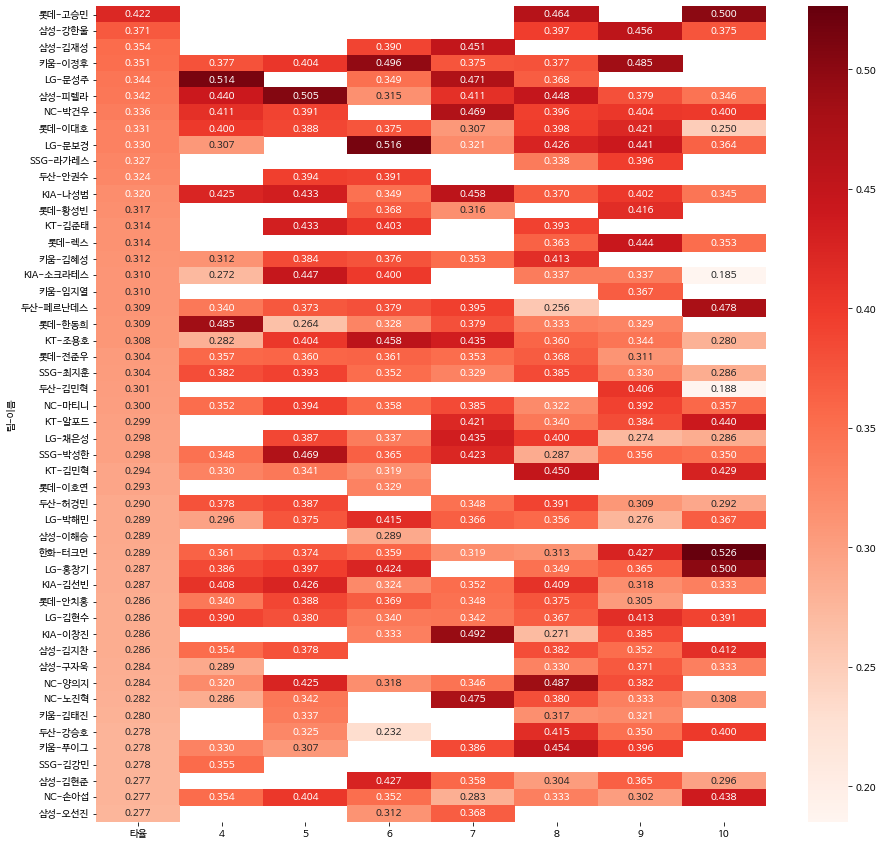

In [103]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data = df_ba_selected,
            annot = True, fmt = '.3f',
            cmap = 'Reds'
            )

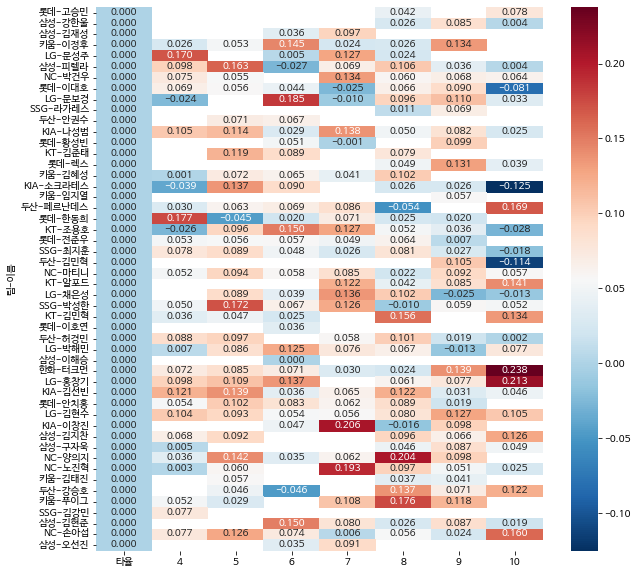

In [104]:
#시즌 전체 타율과의 월별 타율 차이
#시즌 타율을 0으로 초기화해준다

for col in df_ba_selected.columns[1:] :
  df_ba_selected[col] = df_ba_selected[col] - df_ba_selected['타율']
df_ba_selected['타율'] = 0.0

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(data = df_ba_selected.head(50),
            annot = True, fmt = '.3f',
            cmap = 'RdBu_r'
            )

#득점과 홈런, 루타, 도루, 볼넷, 사구, 고4, 희타의 상관관계

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('baseball.csv', encoding = 'cp949')

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num = ['홈런', '루타', '도루', '볼넷', '사구', '고4', '희타']
X = df[num]
Y = df['득점']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

ct = ColumnTransformer([("scaling", StandardScaler(), num)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)
print(X_train)

[[-0.36556306 -0.14489147 -0.67230655 ...  0.75609006 -0.5174168
  -0.53398302]
 [-0.89123708 -1.03956111 -0.67230655 ... -0.74798185 -0.5174168
  -0.53398302]
 [-0.89123708 -1.93423074 -0.67230655 ... -0.74798185 -0.5174168
  -0.53398302]
 ...
 [ 0.16011095  1.4207804  -0.67230655 ...  1.50812601 -0.5174168
  -0.53398302]
 [ 0.16011095 -0.51767048 -0.67230655 ...  0.75609006 -0.5174168
   0.40048726]
 [ 0.16011095  0.37699916 -0.10022919 ... -0.74798185 -0.5174168
   1.33495754]]


In [106]:
#표준 선형 회귀 모형

from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

print('평가용 데이터 세트에 대한 예측값\n', Y_pred)

평가용 데이터 세트에 대한 예측값
 [14.40722702  9.02231243  3.64925617 11.16659728  1.23267455  9.84220758
  2.25841519 12.36849625  7.23546354  1.63916554  9.21163534  3.63676501
  7.84423013 12.04330493  7.21278802 12.60811563  5.69789823  6.46475587
  7.50132147 10.53160255 12.36783299  6.45491013 10.68452757  9.95202876
 10.02098249  9.49154184 11.00833509  6.2358968   7.70356311  8.74571209
  4.66250565 12.32396768 12.65860015  6.38624644 12.36903761 13.40991545
  4.35287365 11.92020228  8.13767538 15.60369795  2.50337466 12.59099916
  9.6922928  11.65057686 16.05002465  7.90978658 10.64150141  8.13299763
  9.9840176   9.01031378  7.64396261  8.77430364  4.84505582 10.49956514
  9.57772042 11.22560744  2.33362359  6.32994698 15.81174258  5.33230539
 11.92953707  8.52427214  6.91401393  7.7617747  11.66036496 12.55957392
 11.06096842  1.52359497 12.38031572 14.71993521 11.80094507  7.44418761
 13.2455924   8.54100959 12.51028034 11.80181938 10.00514359  7.35155545
  5.61786019 18.1324451   7.848

In [107]:
print("학습용 데이터 세트 결정계수 : {:.3f}".format(lr.score(X_train, Y_train)))
print("평가용 데이터 세트 결정계수 : {:.3f}".format(lr.score(X_test, Y_test)))

학습용 데이터 세트 결정계수 : 0.674
평가용 데이터 세트 결정계수 : 0.700


In [108]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, Y_pred))

print("RMSE: {:.3f}".format(rmse))
print("절편: ", np.round(lr.intercept_, 3))
print("가중치: ", np.round(lr.coef_, 3))

RMSE: 2.556
절편:  9.194
가중치:  [-0.146  3.241  1.004  0.738  0.281 -0.093  0.214]


In [78]:
#릿지 선형 회귀 모형

from sklearn.linear_model import Ridge

Rr = Ridge(random_state=0).fit(X_train, Y_train)
Y_pred = Rr.predict(X_test)

print("평가용 데이터 세트에 대한 예측값\n", Y_pred)

평가용 데이터 세트에 대한 예측값
 [14.37850979  9.0213663   3.65457952 11.18786826  1.25342307  9.84630191
  2.27088731 12.33654073  7.24417747  1.66398848  9.21421697  3.65402429
  7.83400754 12.0189242   7.23215565 12.60031914  5.70053915  6.46164535
  7.50372678 10.52307947 12.35120371  6.45923932 10.66197179  9.96077443
 10.02018212  9.47992622 10.99795891  6.23829472  7.69165281  8.75234403
  4.67148853 12.29763227 12.65823659  6.3850866  12.37448043 13.39033196
  4.36066177 11.91926758  8.14563896 15.58453416  2.52125513 12.57392263
  9.70300592 11.65343657 16.03917438  7.90644001 10.63454709  8.12699144
  9.97532207  9.0172329   7.63822933  8.77991645  4.85460251 10.48472623
  9.55557631 11.23077332  2.35490617  6.32420301 15.82150306  5.33788936
 11.9398173   8.52251317  6.92494353  7.75929982 11.66291667 12.54201588
 11.05114321  1.54813435 12.38232146 14.71623545 11.79766868  7.43887294
 13.24757599  8.54648083 12.49488661 11.80509731 10.04065495  7.34364497
  5.62411008 18.11161744  7.856

In [109]:
print("학습용 데이터 세트 결정계수 : {:.3f}".format(Rr.score(X_train, Y_train)))
print("평가용 데이터 세트 결정계수 : {:.3f}".format(Rr.score(X_test, Y_test)))

학습용 데이터 세트 결정계수 : 0.674
평가용 데이터 세트 결정계수 : 0.700


In [110]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))

print("RMSE: {:.3f}".format(rmse))
print("절편: ", np.round(Rr.intercept_, 3))
print("가중치: ", np.round(Rr.coef_, 3))

RMSE: 2.556
절편:  9.194
가중치:  [-0.133  3.221  1.006  0.74   0.28  -0.09   0.213]


In [111]:
#라쏘 선형 회귀 모형

from sklearn.linear_model import Lasso

Lr = Lasso(random_state=0, alpha=0.001, max_iter=10000).fit(X_train, Y_train)
Y_pred = Lr.predict(X_test)

print("평가용 데이터 세트에 대한 예측값\n", Y_pred)

평가용 데이터 세트에 대한 예측값
 [14.40345037  9.02200129  3.65142049 11.16813817  1.23751633  9.84132461
  2.26205693 12.36371958  7.23700656  1.64522856  9.21085155  3.64080549
  7.84175386 12.03849355  7.2114923  12.6054443   5.69709871  6.46348087
  7.50043817 10.52990893 12.36346117  6.45412905 10.6801383   9.95209128
 10.02042204  9.48859889 11.00710447  6.23712113  7.70155329  8.74775318
  4.6653461  12.32024549 12.65962836  6.38566547 12.36934152 13.40468415
  4.35236179 11.92015235  8.13199395 15.59843664  2.50566027 12.5893149
  9.69605508 11.65117741 16.05137946  7.91076439 10.64018247  8.13082984
  9.97927011  9.01070791  7.64325273  8.77561178  4.84775757 10.49704984
  9.57369769 11.2220846   2.33827948  6.32895777 15.81603145  5.33295414
 11.92980405  8.52092804  6.91303358  7.75968762 11.66448241 12.55381863
 11.0579026   1.52853386 12.38263345 14.71645218 11.79794224  7.44407322
 13.24330861  8.54028082 12.50413591 11.80596511 10.01045912  7.34703646
  5.61761583 18.13194456  7.8477

In [112]:
print("학습용 데이터 세트 결정계수 : {:.3f}".format(Lr.score(X_train, Y_train)))
print("평가용 데이터 세트 결정계수 : {:.3f}".format(Lr.score(X_test, Y_test)))

학습용 데이터 세트 결정계수 : 0.674
평가용 데이터 세트 결정계수 : 0.700


In [113]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))

print("RMSE: {:.3f}".format(rmse))
print("절편: ", np.round(Lr.intercept_, 3))
print("가중치: ", np.round(Lr.coef_, 3))

RMSE: 2.556
절편:  9.194
가중치:  [-0.143  3.238  1.004  0.737  0.28  -0.091  0.213]
